### Import libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import cv2 
# import supportive functionality 
import helpers 
# import seaborn as sns

%matplotlib inline

As usually, we will load our dataset and **standardize this**, using functions, that we built previously.

### Data preprocessing

#### Visualize example

In [2]:
image_dir_training = 'training'
image_dir_test = 'test'

In [3]:
IMAGE_LIST = helpers.load_dataset(image_dir_training)

Now, visualize an example and standardize the input.

Image shape (737, 1024, 3)
Label:  day


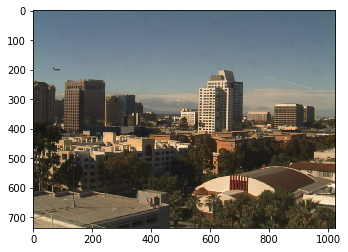

In [4]:
index = 2
example = IMAGE_LIST[index][0]
label = IMAGE_LIST[index][1]
plt.imshow(example)
print('Image shape', example.shape)
print('Label: ', label)

#### Data standartisation

Create a class to standardize both input image and label.

In [5]:
"""
- in the future we can write python program for class and call the necessary function
"""
class Standardize():
    def __init__(self):
        self.standardized_list = []
        self.numerical_value = 0
        
    def standardize_input(self, image_list):
        for item in image_list:
            image = item[0]
            label = item[1]
            image = np.copy(image)
            label = np.copy(label)
            # standaridize the images 
            image_std = cv2.resize(image, (1100,600))
            # standardize label
            label_binary = self.numerical_value if label == 'night' else 1
            self.standardized_list.append((image_std,label_binary))
        return self.standardized_list

In [6]:
s1 = Standardize()
IMAGE_LIST_std = s1.standardize_input(IMAGE_LIST)

Next, let's visualize our standardized data.

Imae shape:  (600, 1100, 3)
Label:  1


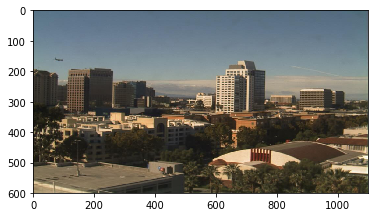

In [7]:
index = 2
example = IMAGE_LIST_std[index][0]
label = IMAGE_LIST_std[index][1]
plt.imshow(example)
print('Imae shape: ', example.shape)
print('Label: ', label)

Here we see the dimensions of displayed images and their labels. 

### Feature extraction 

Now, we are ready to separate these images on day and night. We will separate them based on average brightness. 

This will be a single value and we assume, that **average value for day will be higher** than average value for night.<br>
To calculate average  brightness we will use **HSV colorspace**.

We will use specifically **Value** channel: *we will sum it up and divide by area of image* (height multiplied by width).

### RGB to HSV conversion

Fisrst of all, we will take a look at couple of day and night images. <br>
Lets convert them from RGB to HSV.

In [8]:
# fist day image 
img_day_1 = IMAGE_LIST_std[0][0]
img_day_1 = np.array(img_day_1)
img_day_1 = cv2.cvtColor(img_day_1, cv2.COLOR_RGB2HSV)

# seconf day image 
img_day_2 = IMAGE_LIST_std[1][0]
img_day_2 = np.array(img_day_2)
img_day_2 = cv2.cvtColor(img_day_2, cv2.COLOR_RGB2HSV)

Now, we display the results.

#### Display day images

Text(0.5, 1.0, 'Value, day image 1')

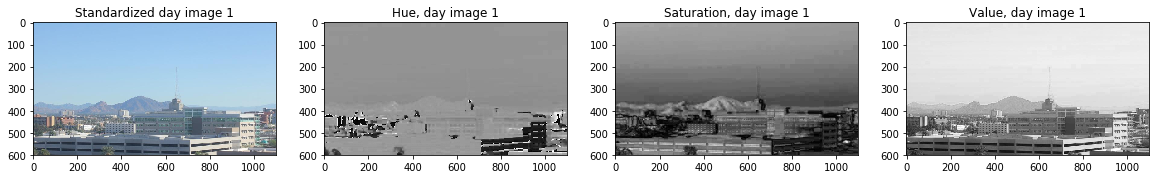

In [9]:
image_day_1_h = img_day_1[:,:,0]
image_day_1_s = img_day_1[:,:,1]
image_day_1_v = img_day_1[:,:,2]

fig, (ax0, ax1,ax2,ax3) = plt.subplots(1,4, figsize = (20,10))

ax0.imshow(IMAGE_LIST_std[0][0])
ax0.set_title('Standardized day image 1')
ax1.imshow(image_day_1_h, cmap = 'gray')
ax1.set_title('Hue, day image 1')
ax2.imshow(image_day_1_s, cmap = 'gray')
ax2.set_title('Saturation, day image 1')
ax3.imshow(image_day_1_v, cmap = 'gray')
ax3.set_title('Value, day image 1')

Text(0.5, 1.0, 'Value, image 2')

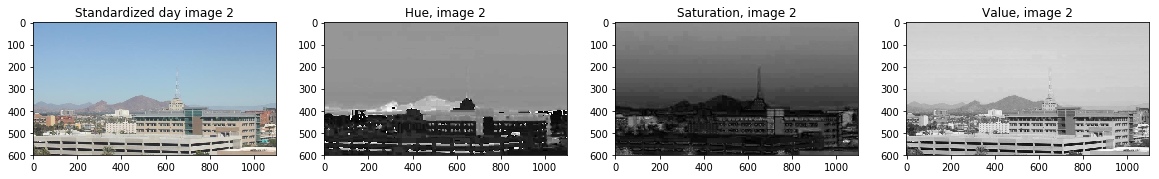

In [10]:
image_day_2_h = img_day_2[:,:,0]
image_day_2_s = img_day_2[:,:,1]
image_day_2_v = img_day_2[:,:,2]

fig, (ax0, ax1,ax2,ax3) = plt.subplots(1,4, figsize = (20,10))
ax0.imshow(IMAGE_LIST_std[1][0])
ax0.set_title('Standardized day image 2')
ax1.imshow(image_day_2_h, cmap = 'gray')
ax1.set_title('Hue, image 2')
ax2.imshow(image_day_2_s, cmap = 'gray')
ax2.set_title('Saturation, image 2')
ax3.imshow(image_day_2_v, cmap = 'gray')
ax3.set_title('Value, image 2')

Based on days images we can say, that Value channel is **especially high for the skies**.<br>
This is has logical assumption, that day sky is brighter, than night sky, so **value channel is more closed to 255**.

#### Display night imges

In [11]:
# fist night image 
img_night_1 = IMAGE_LIST_std[6][0]
img_night_1 = np.array(img_night_1)
img_night_1 = cv2.cvtColor(img_night_1, cv2.COLOR_RGB2HSV)

# second night image 
img_night_2 = IMAGE_LIST_std[5][0]
img_night_2 = np.array(img_night_2)
img_night_2 = cv2.cvtColor(img_night_2, cv2.COLOR_RGB2HSV)

Text(0.5, 1.0, 'Value, night image 1')

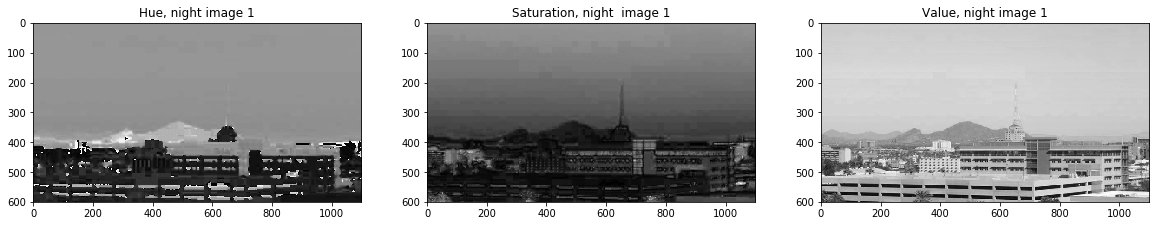

In [12]:
img_night_1_h = img_night_1[:,:,0]
img_night_1_s = img_night_1[:,:,1]
img_night_1_v = img_night_1[:,:,2]

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20,10))

ax1.imshow(img_night_1_h, cmap = 'gray')
ax1.set_title('Hue, night image 1')
ax2.imshow(img_night_1_s, cmap = 'gray')
ax2.set_title('Saturation, night  image 1')
ax3.imshow(img_night_1_v, cmap = 'gray')
ax3.set_title('Value, night image 1')

Text(0.5, 1.0, 'Value, night image 2')

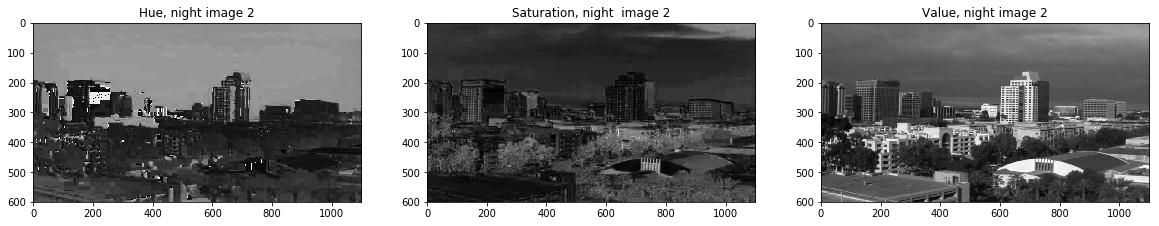

In [13]:
img_night_2_h = img_night_2[:,:,0]
img_night_2_s = img_night_2[:,:,1]
img_night_2_v = img_night_2[:,:,2]

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20,10))

ax1.imshow(img_night_2_h, cmap = 'gray')
ax1.set_title('Hue, night image 2')
ax2.imshow(img_night_2_s, cmap = 'gray')
ax2.set_title('Saturation, night  image 2')
ax3.imshow(img_night_2_v, cmap = 'gray')
ax3.set_title('Value, night image 2')

Based on night images displayed, we can ussume **low Value channel level**, especially for skies. 

### Find average brightness using V channel

Define an average brightness function, that takes an RGB image and returns average Value per pixel.

In [14]:
"""
- convert to HSV colorspace
- sum up by Value 
- divide resulted sum by number of pixels 
"""

def average_brightness(rgb_image): 
    rgb_image = np.copy(rgb_image)    
    image_hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    # add up all the pixel values in V channel
    value = np.sum(image_hsv[:,:, 2])
    # multiply height and width 
    pxl = image_hsv.shape[0] * image_hsv.shape[1]
    average_value = round(value/pxl,3)
    return average_value

Rewrite the same function with **class method**, that inputs entire list of standardized images and outputs following:<br>
 - new list with added average brightness to **tuple**: pair of image, label;
 - visulaize **distribution of night and day averages**;

In [29]:
class AverageBrightness():
    
    def __init__(self):
        # define two functions: add value to pair 
        # and visualize distributions
        self.list_with_bright = []
        self.night_list = []
        self.day_list = []
    def average_bright(self, standardized_list):
        for item in standardized_list:
            rgb_image = item[0]
            hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
            value = np.sum(hsv[:,:,2])
            pxl = hsv.shape[0] * hsv.shape[1]
            aver_bright = value / pxl
            # Note: we are adding item to a tuple! We use +(<some item>, )
            item = item + (aver_bright,)
            self.list_with_bright.append(item)
        return self.list_with_bright
    # plot resulted average brightness with respect to day/night 
    def plot_brightness(self, list_with_bright):
        import seaborn as sns
        plt.style.use('ggplot')
        
        for item in list_with_bright:
            brightness_value = item[2]
            if item[1]==0:
                self.night_list.append(brightness_value)
            else:
                self.day_list.append(brightness_value)  
        # plot night average brightness
        fig, ax1 = plt.subplots(figsize = (10,6))
        mean = np.mean(self.night_list)
        sns.distplot(self.night_list)
        ax1.axvline(mean, color='k', linestyle='dashed', linewidth=0.8)
        ax1.set_title('Night average brightness distribution')
        print('Night Mean value: ', round(mean,2))
        
        # plot day average brightness
        fig, ax2 = plt.subplots(figsize = (10,6))
        mean = np.mean(self.day_list)
        sns.distplot(self.day_list)
        ax2.axvline(mean, color='k', linestyle='dashed', linewidth=0.8)
        ax2.set_title('Day average brightness distribution')
        print('Day Mean value: ', round(mean,2))

Now, we **initialize the class (s1) and prepare a small check of items** in the list. 

In [30]:
s1 = AverageBrightness()
full_list = s1.average_bright(IMAGE_LIST_std)

In [31]:
print('Standardized list length:', len(IMAGE_LIST_std))
print('Embedded list length:', len(full_list))

Standardized list length: 79
Embedded list length: 79


In [32]:
print('Length of first image in standardized list: ', len(IMAGE_LIST_std[0]))
print('Length of first image in embedded list: ', len(full_list[0]))

Length of first image in standardized list:  2
Length of first image in embedded list:  3


Night Mean value:  46.87
Day Mean value:  151.35


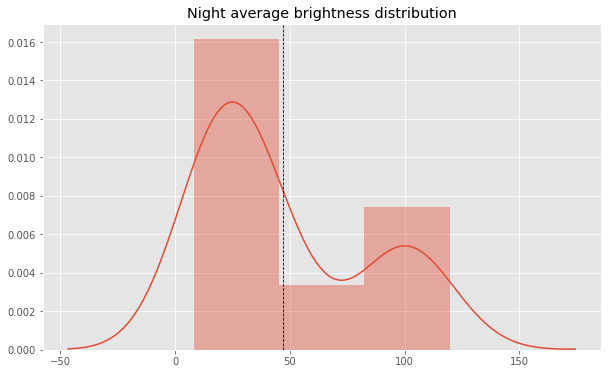

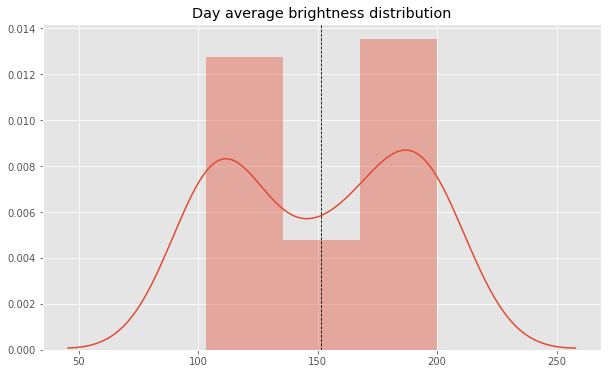

In [34]:
s1.plot_brightness(full_list)

Next, our step will be to look at average brightness value for day and night images.<br>
Our goal is to **find a vaue (threshold), that clearly separates day and night images**.

**Idea**: what's about maximizing the difference in average brightness for day and night distributions?

First, take a look at **day image**. 

Image shape (600, 1100, 3)
Average brightness value 191.575


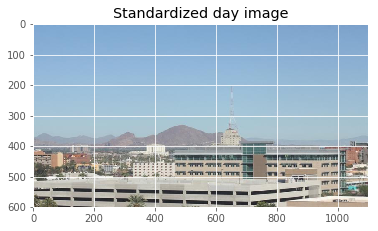

In [27]:
plt.imshow(IMAGE_LIST_std[1][0])
plt.title('Standardized day image')
print('Image shape', IMAGE_LIST_std[1][0].shape)
print('Average brightness value', average_brightness(IMAGE_LIST_std[1][0]))

Then, look at the **night image more precisely**. 


Image shape (600, 1100, 3)
Average brightness value 189.666


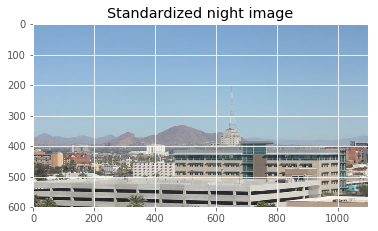

In [28]:
plt.imshow(IMAGE_LIST_std[6][0])
plt.title('Standardized night image')
print('Image shape', IMAGE_LIST_std[6][0].shape)
print('Average brightness value', average_brightness(IMAGE_LIST_std[6][0]))

See, how night **average brightness value is much smaller** in comparison with day.

Note, that the average brightness is just an **image that considered as a feature**.<br>
Now, it's up to us to choose the relevant **threshold for average brightness to feed this into classifier**.